## Function wrapping

Consider, as a first example for wrapping, function composition:

$$(g\circ f)(x)=g(f(x))$$

Example: $f(x) = \frac{1}{1+x^2}$ and $g(x) = e^{x}$, and then,

$$g(f(x)) = e^{f(x)} = e^{\frac{1}{1+x^2}}.$$

How to compose functions in Python? A first approach:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 1 / (1 + x**2)
def g(x):
    return np.exp(x)

To call $g(f(1))$, we can directly write:

In [43]:
print(g(f(1)))

1.6487212707001282


We can even plot the composed functions, either way:

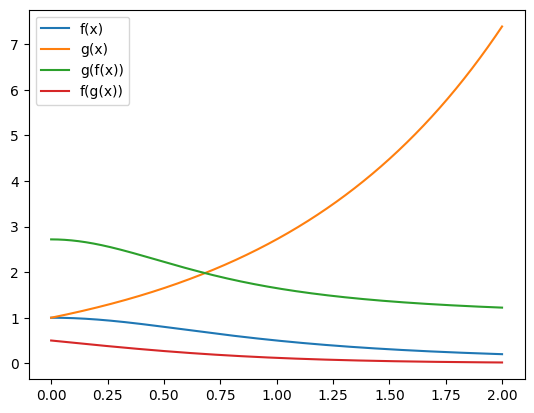

In [44]:
xx = np.linspace(0,2,1000)
plt.plot(xx,f(xx), label="f(x)");
plt.plot(xx,g(xx), label="g(x)");
plt.plot(xx,g(f(xx)), label="g(f(x))");
plt.plot(xx,f(g(xx)), label="f(g(x))");
plt.legend();

This does not seem complicated, after all.
But notice that Python just passes the result of function as argument for the next function.
For $g(f(1))$, what Python does is to calculate $f(1)=1/2$ and then pass the $1/2$ to $g$ as $g(1/2)$.
What if we want to pass the actual function as argument, instead of its value?
We want a process that gives $e^{1/(1+x^2)}$ as a result, as a new function that can be used later.
What's more: we want our composing function to take any pair of arbitrary functions.

For that, we use wrapping:

In [50]:
def composition(func1,func2):
    def wrapped_composition(x):
        return func1(func2(x))
    return wrapped_composition

The idea behind wrapping is that we call a function that has functions as arguments.
When that function is called, it has a nested function inside that calculates the composition in general,
not just for a particular numerical value. It does it for any $x$.
Then, the nested function returns the operation in general, and the outer function returns what the inner gives.

In [55]:
h=composition(g,f)
print(h(1))

1.6487212707001282


In this example, $h$ is from now on $h=g\circ f$ and has its own existence to be utilised at any moment.
We can, for example, plot it:

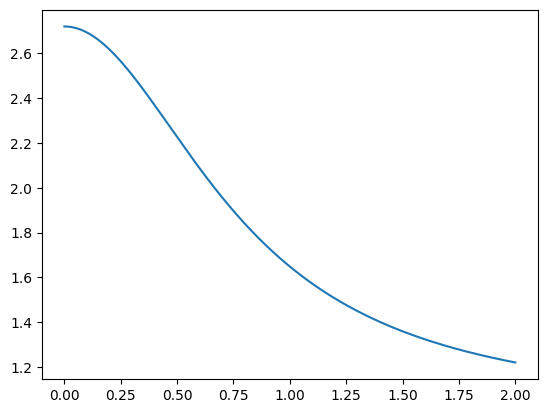

In [56]:
plt.plot(xx,h(xx));

Let's explore the wrapping logic further by printing partial steps of the wrapped function.
Notice how the first thing to be printed is "wrapped_composition", which is our desired function.
Once the inner function is called, it gives the numerical value of the composition at $x=1$.
The main idea is that $x$ is called internally, in such a way that, once, wrapped,
what we get is a generic function.

In [57]:
def composition_test(func1,func2):
    def wrapped_composition_test(x):
        print(f"func1(func2(x))={func1(func2(x))}")
        return func1(func2(x))
    print(f"wrapped_composition={wrapped_composition_test}")
    return wrapped_composition_test
h2=composition_test(g,f)
print(f"h2(1)={h2(1)}")

wrapped_composition=<function composition_test.<locals>.wrapped_composition_test at 0x7fd6d4a445e0>
func1(func2(x))=1.6487212707001282
h2(1)=1.6487212707001282


As an example of the possibilities offered by wrapping, consider the following self composition:

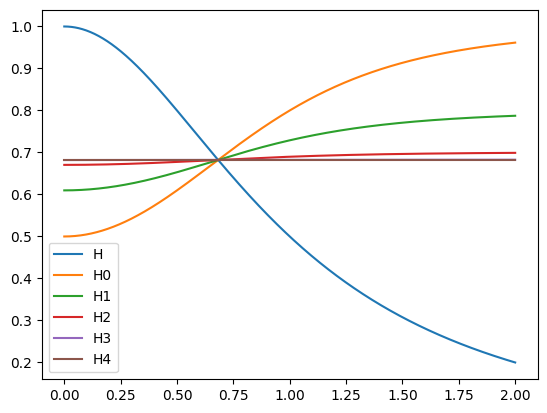

In [58]:
def H(x):
    return 1/(1+x**2)
plt.plot(xx,H(xx),label="H");
for i in range(5):
    H=composition(H,H);
    plt.plot(xx,H(xx),label=f"H{i}")
plt.legend();

Wrapping is not restricted to function composition. It can be applied to any function of functions.
Here is a function that multiplies two functions:

In [59]:
def multiplication(func1,func2):
    def wrapped_multiplication(x):
        return func1(x)*func2(x)
    return wrapped_multiplication

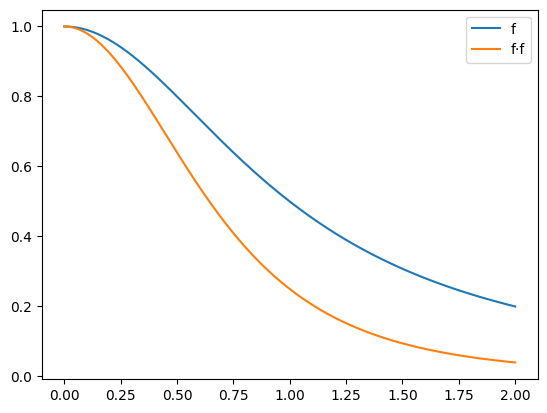

In [60]:
j = multiplication(f,f)
plt.plot(xx,f(xx), label="f")
plt.plot(xx,j(xx), label="f·f")
plt.legend();

Interestingly, once functions are dealt as arguments, we can even interpolate between them (or even go full Bezier!).
Here, a simple interpolation function is shown.

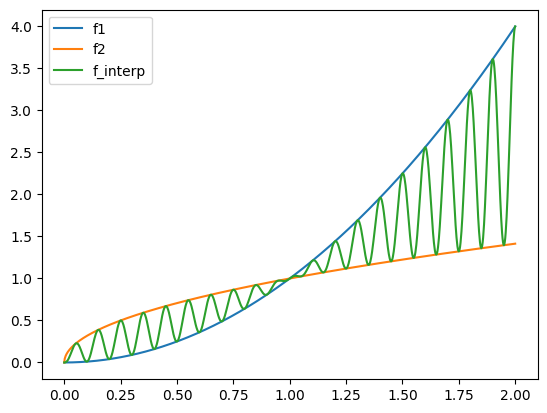

In [63]:
def interpolation(func1,func2,weight_func): # the interpolation weight can be a function as well
    def wrapped_interpolation(x):
        return weight_func(x)*func1(x)+(1-weight_func(x))*func2(x)
    return wrapped_interpolation
# we define a custom weight function
def my_weight_func(x):
    return 0.5*(1+np.cos(2*np.pi*x/0.1))
# we define the functions to be interpolated
def f1(x):
    return x**2
def f2(x):
    return np.sqrt(x)
# now we build the interpolated function
f_interpolated = interpolation(f1,f2,my_weight_func)
# we plot f1, f2 and the interpolated result
plt.plot(xx,f1(xx),label="f1")
plt.plot(xx,f2(xx),label="f2")
plt.plot(xx,f_interpolated(xx),label="f_interp")
plt.legend();